# Exploratory Data Analysis on Texas Death Row Inmates Executed in 2018

The Dataset used is a Deathrow dataset which contains data for inmates in Texas just before they were executed in 2018. It attracks alot of emotion while going through the "statement" column which contains their last words before execution. <br> 

Is a privilage to have such data from kaggle and experiment with it.  

In [36]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 217.9 kB/s eta 0:00:02
   -- ------------------------------------ 20.5/300.2 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 195.7 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 272.3 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 348.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 363.1 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 387.0 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 409.6 kB/s eta 0:00:01
   -

In [1]:
# Import the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
#Read the dataset
data = pd.read_csv(r"C:\Users\PC\Desktop\huduma data\tx_deathrow_full.csv")

# Inspecting the Data

In [6]:
data.head()

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ\nNumber,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...
1,552,1951-08-28,1979-05-27,12.0,Bible,Danny Paul,999455,66,2003-07-17,2018-06-27,White,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN
2,551,1981-04-03,2003-12-03,10.0,Castillo,Juan Edward,999502,37,2005-09-27,2018-05-16,Hispanic,Bexar,Brown,180.0,"5' 11""",Bexar,Texas,To everyone that has been there for me you kno...
3,550,1987-04-04,2008-04-06,11.0,Davila,Erick Daniel,999545,31,2009-02-27,2018-04-25,Black,Tarrant,Brown,161.0,"5' 11""",Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ..."
4,549,1980-03-26,2005-09-13,12.0,Rodriguez III,Rosendo,999534,38,2008-05-14,2018-03-27,Hispanic,Lubbock,Brown,198.0,"5' 8""",Wichita,Texas,First I would like to say I have been here sin...


# Data Cleaning

In [4]:
#Drop unnecessary columns.
myData = data.drop(['Execution','Date of Birth','Date of Offence','First Name','TDCJ\nNumber','Date Received','Last Statement'], axis=True)

In [10]:
myData.tail()

,Highest Education Level,Last Name,Age at Execution,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State
548,NaN,Skillern,49,1985-01-16,White,Lubbock,NaN,NaN,NaN,NaN,NaN
549,NaN,Barefoot,39,1984-10-30,White,Bell,NaN,NaN,NaN,NaN,NaN
550,NaN,O'Bryan,39,1984-03-31,White,Harris,NaN,NaN,NaN,NaN,NaN
551,6.0,Autry,29,1984-03-14,White,Jefferson,Brown,137.0,"5' 8""",Potter,Texas
552,12.0,"Brooks, Jr.",40,1982-12-07,Black,Tarrant,Maroon,150.0,"5' 9""",Tarrant,Texas


In [11]:
#check for null values.
myData.isnull().sum()

Highest Education Level    48
Last Name                   0
Age at Execution            0
Execution Date              0
Race                        0
County                      0
Eye Color                  35
Weight                     42
Height                     40
Native County              43
Native State               29
dtype: int64

In [12]:
# Dealing with null values in columns with numerical values.
df=myData.fillna(myData.iloc[:,[0,7]].mean())

In [13]:
df.tail()

,Highest Education Level,Last Name,Age at Execution,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State
548,10.208911,Skillern,49,1985-01-16,White,Lubbock,NaN,175.982387,NaN,NaN,NaN
549,10.208911,Barefoot,39,1984-10-30,White,Bell,NaN,175.982387,NaN,NaN,NaN
550,10.208911,O'Bryan,39,1984-03-31,White,Harris,NaN,175.982387,NaN,NaN,NaN
551,6.000000,Autry,29,1984-03-14,White,Jefferson,Brown,137.000000,"5' 8""",Potter,Texas
552,12.000000,"Brooks, Jr.",40,1982-12-07,Black,Tarrant,Maroon,150.000000,"5' 9""",Tarrant,Texas


In [ ]:
long_decimal_values = df[df['Highest Education Level'].astype(str).str.contains('\.\d{2,}', regex=True)]

# Drop those rows from the DataFrame
df_cleaned = df[~df.index.isin(long_decimal_values.index)]

# Display the cleaned DataFrame
print(df_cleaned)

# Expressions of Humanity: Analyzing the Last Words of Death Row Inmates

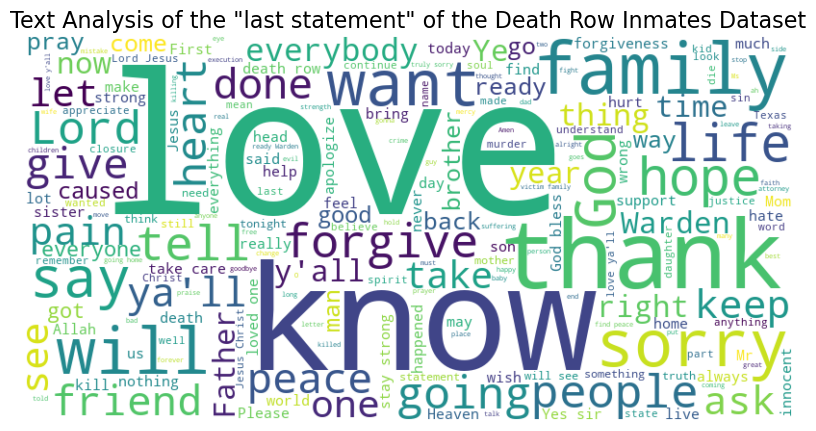

In [7]:
# Combine all statements into a single string
text = ' '.join(data['Last Statement'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Text Analysis of the "last statement" of the Death Row Inmates Dataset', fontsize=16)
plt.show()

### Analysis of the Word Cloud Visualization

The word cloud created from the last statements of death row inmates offers a profound glimpse into their emotional states and the themes that resonate in their final words. Here are the key observations drawn from the visualization:

1. **Love and Family**: The prominence of words like **"Love"** and **"Family"** suggests a deep longing for connection and the significance of relationships, even in the face of impending death. This highlights the universal human need for bonds and the importance of loved ones during pivotal moments in life.

2. **Expressions of Gratitude and Remorse**: The presence of terms such as **"Thank,"** **"Sorry,"** **"Forgive,"** **"God,"** and **"Hope"** indicates a complex emotional landscape where inmates express gratitude, seek forgiveness, and invoke a higher power. These words reflect a blend of remorse and aspiration, showcasing the inmates’ reflections on their past actions and their hopes for redemption.

3. **Value of Life**: The recurring mention of the word **"Life"** emphasizes the value placed on existence itself. This suggests that, despite their circumstances, the inmates reflect on the significance of their lives and the experiences that shaped them.

4. **Desire for Understanding**: The inclusion of words like **"Know,"** **"Want,"** and **"Say"** implies a strong desire for their stories to be acknowledged and understood. This indicates that, in their final moments, the inmates seek to communicate their truths and have their voices heard, highlighting the human instinct for expression and connection.

### Conclusion
Overall, the word cloud serves as a powerful reminder of the complex emotions and themes present in the last statements of death row inmates. It reveals their hopes, regrets, and desires for connection, urging us to recognize their humanity even in the face of their circumstances.

In [40]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


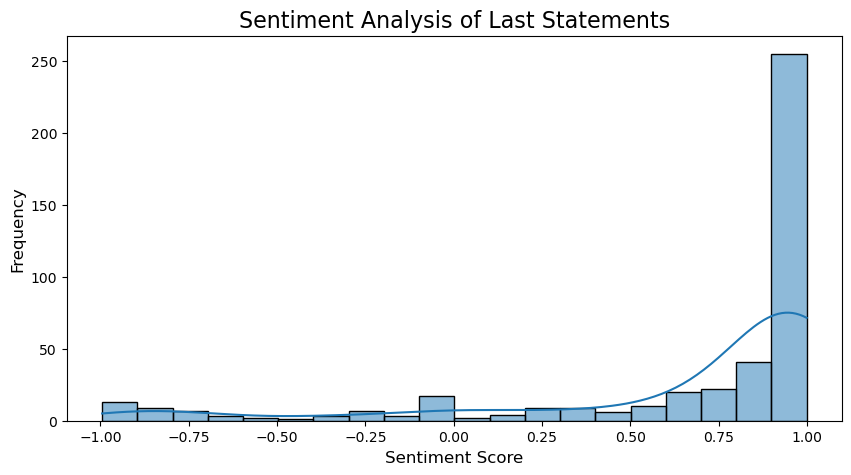

In [42]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon') 

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each statement
data['Sentiment'] = data['Last Statement'].dropna().apply(lambda x: sia.polarity_scores(x)['compound'])

# Create a histogram of sentiment scores
plt.figure(figsize=(10, 5))
sns.histplot(data['Sentiment'], bins=20, kde=True)
plt.title('Sentiment Analysis of Last Statements', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


#  Sentiment Analysis of Last Statements from Death Row Inmates

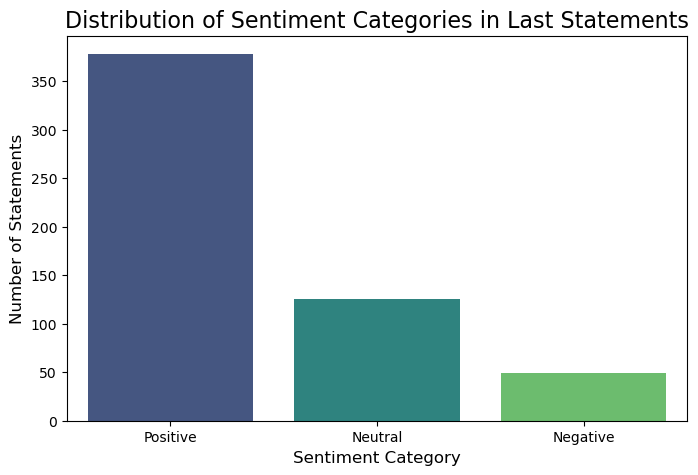

In [43]:
# Classify sentiments into categories
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment Category'] = data['Sentiment'].apply(categorize_sentiment)

# Count the number of statements in each category
sentiment_counts = data['Sentiment Category'].value_counts()

# Create a bar plot for sentiment categories
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiment Categories in Last Statements', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Statements', fontsize=12)
plt.show()


The bar graph illustrating the distribution of sentiment categories among the last statements of death row inmates reveals significant insights into their emotional landscapes as they approached execution.<br>

1. Positive Sentiments: The predominant frequency of positive sentiments (over 350) indicates that many death row inmates expressed hopeful and uplifting emotions in their last statements. This suggests a remarkable psychological resilience, where inmates sought peace, closure, and acceptance despite their circumstances.
2. Neutral Sentiments: The presence of neutral sentiments (between 100 and 150) highlights that a significant number of statements lacked strong emotional engagement. This may reflect a sense of resignation or the difficulty of articulating profound feelings in such overwhelming moments.
3. Negative Sentiments: With only about 50 negative statements, it appears that relatively few inmates expressed overt regret or despair. This lower frequency suggests that many chose to focus on positive reflections or maintained a sense of hope even in their final moments.

# Educational Background 

Understanding the educational background of these individuals provides insight into the socio-economic factors that might correlate with incarceration and capital punishment.

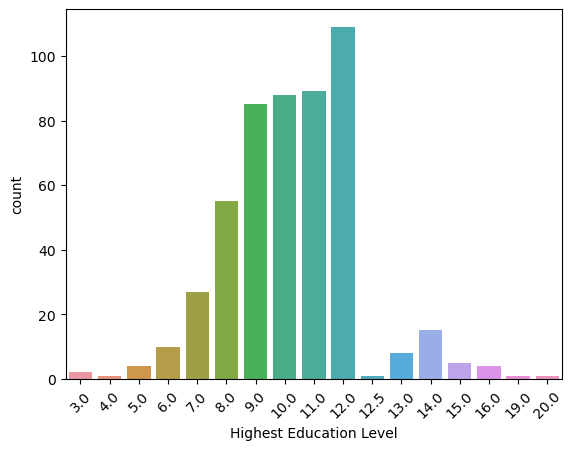

In [34]:
sns.countplot(x='Highest Education Level', data=df_cleaned)
plt.xticks(rotation=45) 
plt.show()

Most inmates have low to moderate education:

The largest bar in the graph represents inmates with a 12th-grade education, indicating that the majority of inmates completed high school or were close to finishing.<br>
There are also significant numbers of inmates with education levels around 9th to 11th grade, suggesting many did not finish high school.

The graph tells a story about the strong presence of lower educational attainment among the Texas death row population. <br>This finding may prompt discussions about the broader societal factors, such as education, that contribute to criminal behavior, highlighting the role education can play in shaping life outcomes and reducing the likelihood of incarceration.

# Age at Execution vs. Education Level Across Racial Groups

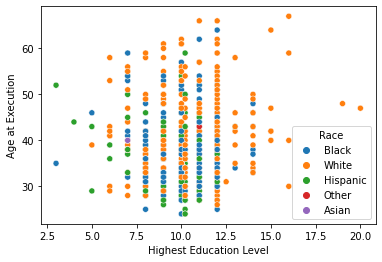

In [73]:
sns.scatterplot(x='Highest Education Level',y='Age at Execution', data=df, hue='Race')
plt.show()

While most executions seem to happen in the middle age ranges, there is notable variability in the ages, suggesting that education level may not directly correlate with age at execution

 It suggests that most inmates, regardless of race, tend to have lower educational backgrounds and are executed between the ages of 30 and 50.

# Racial Distribution 

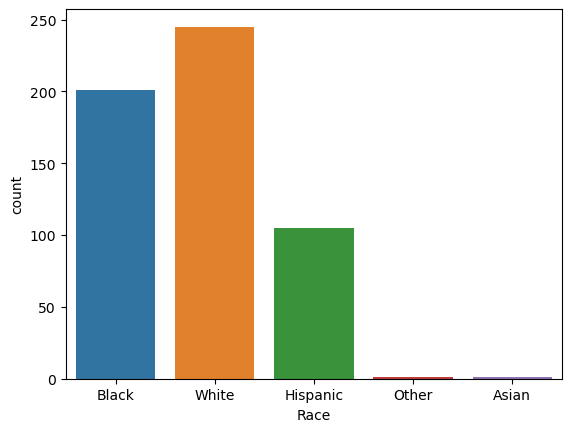

In [27]:
sns.countplot(x='Race', data=df)
plt.show()

This graph provides a clear visual representation of racial disparities among Texas death row inmates executed in 2018. White inmates form the largest group, followed by Black and Hispanic inmates. This visualization underscores the need for a discussion about the intersection of race and the criminal justice system, especially regarding capital punishment


# Age Distribution

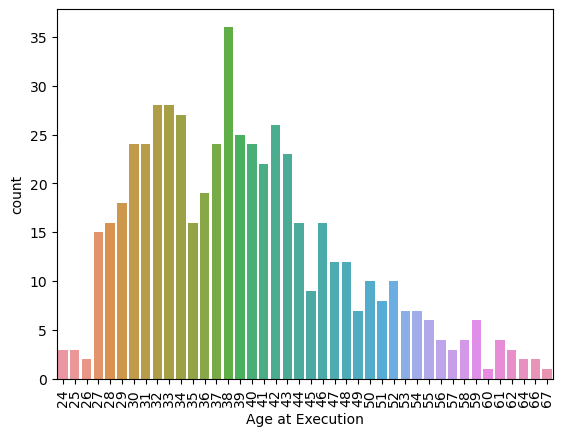

In [17]:
sns.countplot(x='Age at Execution', data=df)
plt.xticks(rotation=90) 
plt.show()

Key observations<br>

<li> The highest bars are concentrated between the ages of 30 and 40, suggesting that most individuals on death row were executed in this age range.</li> 
<li> The bars start to taper off after 40, with fewer executions occurring for older inmates. This could indicate that fewer people in older age groups are executed, either due to legal factors, health issues, or other reasons.</li>
<li> There is a relatively small number of executions for individuals in their 20s, suggesting that inmates are generally not executed at a very young age.</li>

# Distribution of Highest Education Levels Across Racial Groups   

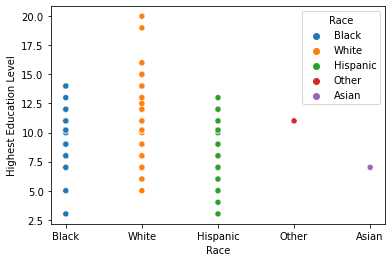

In [79]:
sns.scatterplot(x='Race',y='Highest Education Level', data=df, hue='Race')
plt.show()

Key observations include <br>

<li> The White and Hispanic groups seem to dominate the mid-levels of education.</li>
<li> Black individuals are spread across the education spectrum but seem less concentrated at higher education levels.</li>
<li>There are fewer observations for the Other and Asian categories, indicating they may be underrepresented in the dataset.</li>

This plot suggests that education level and race could be key factors to explore further, potentially influencing life circumstances and the likelihood of facing execution.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


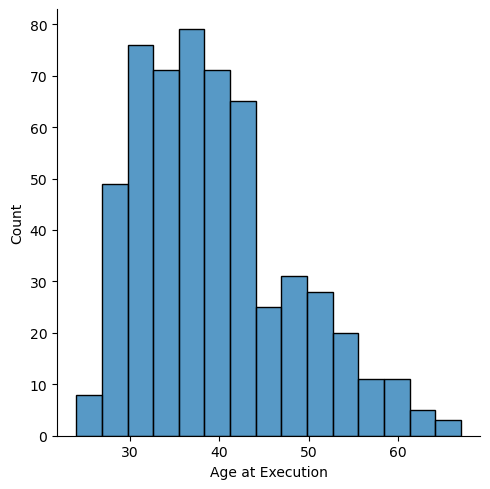

In [28]:
#Age distribution 
sns.displot(df['Age at Execution'],bins=15)

# Pairwise Relationships and Distributions of Numerical Features in Texas Death Row Dataset

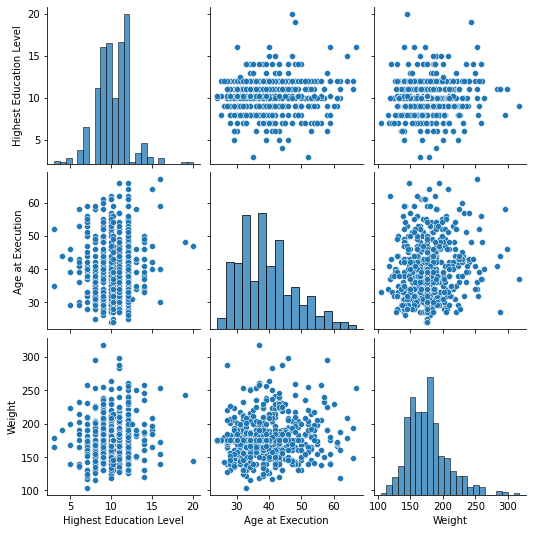

In [88]:
sns.pairplot(df)